___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7


#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](attachment:./www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
df['not.fully.paid']=22


df['not.fully.paid'].where(~(df['revol.bal'] == 0), other=1, inplace=True)
df['not.fully.paid'].where(~(df['revol.bal'] != 0), other=0, inplace=True)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
df['not.fully.paid'].isin([1]).sum()

321

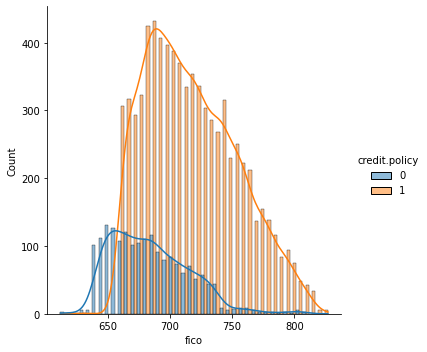

In [ ]:
import seaborn as sns
#titanic_dataset = sns.load_dataset("data")

# Постройка графика
#sns.barplot(x="fico", y="not.fully.paid", data=df, hue="not.fully.paid");
#sns.displot(df['fico'], stat = 'density', bins = 20, kde = True)
sns.displot(x=df['fico'],
            hue=            df['credit.policy'],
            data=df,multiple='dodge',
            kde=True);

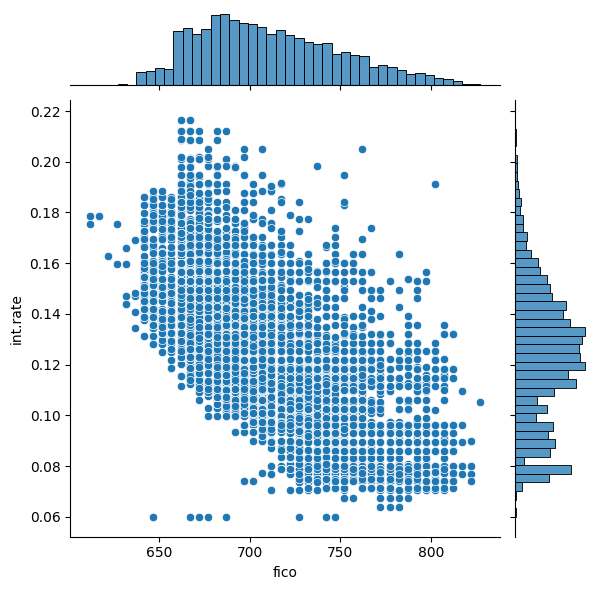

In [ ]:
sns.jointplot(data=df, x=df['fico'], y=df['int.rate'])

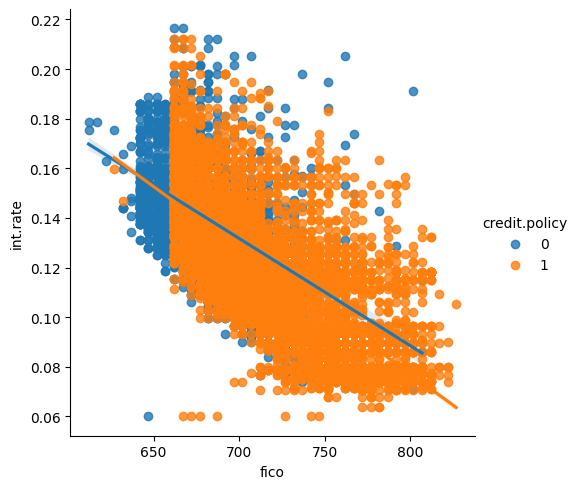

In [ ]:
sns.lmplot(x= 'fico', y = 'int.rate', data = df,  hue = 'credit.policy')

In [ ]:
dff=pd.get_dummies(df.purpose)
df = pd.concat([df, dff], axis=1, join="inner")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,...,0,0,0,1,0,0,0,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,...,0,0,0,1,0,0,0,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,...,0,0,0,0,0,1,0,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df[
    [
    "int.rate",
    #'installment',
    'log.annual.inc', 
    #'dti',
    'fico', 
    'days.with.cr.line',

    'revol.bal',
    #'revol.util',
    'inq.last.6mths',

    #'delinq.2yrs',
    #'pub.rec',
    #'credit_card',
    #'debt_consolidation',
    #'educational',
    #'home_improvement',
    #'major_purchase',
    #'small_business',
    #'all_other'
    ]
]
y = df['credit.policy']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#створення моделі
reg = LogisticRegression()
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.898981989036805
0.8987473903966597


In [ ]:
import numpy as np

y_pred = reg.predict(X_test)
reg.predict(np.array([0.14, 10.59, 687, 1800,10000,1]).reshape(1, -1))

C:\Users\Evgeniy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.9801618376403028
0.9733820459290188


In [ ]:
import numpy as np
y_pred_tree = classifier.predict(X_test)
classifier.predict(np.array([0.14, 10.59, 687, 1800,10000,1]).reshape(1, -1))

C:\Users\Evgeniy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

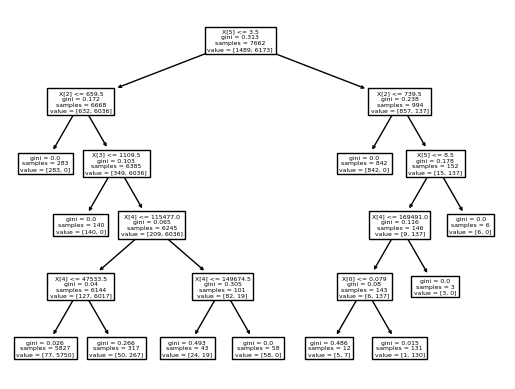

In [ ]:
tree.plot_tree(classifier);

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 219  160]
 [  34 1503]]
              precision    recall  f1-score   support

           0       0.87      0.58      0.69       379
           1       0.90      0.98      0.94      1537

    accuracy                           0.90      1916
   macro avg       0.88      0.78      0.82      1916
weighted avg       0.90      0.90      0.89      1916



In [ ]:

print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[ 359   20]
 [  34 1503]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       379
           1       0.99      0.98      0.98      1537

    accuracy                           0.97      1916
   macro avg       0.95      0.96      0.96      1916
weighted avg       0.97      0.97      0.97      1916



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rand_forest = RandomForestClassifier(n_estimators=5, max_features="auto", random_state=44)
classifier_rand_forest.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

y_pred_rand_forest = classifier.predict(X_test)
classifier.predict(np.array([0.14, 10.59, 687, 1800,10000,1]).reshape(1, -1))

0.9801618376403028
0.9733820459290188


C:\Users\Evgeniy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Evgeniy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
print(confusion_matrix(y_test, y_pred_rand_forest))
print(classification_report(y_test, y_pred_rand_forest))

[[ 333   46]
 [   5 1532]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       379
           1       0.97      1.00      0.98      1537

    accuracy                           0.97      1916
   macro avg       0.98      0.94      0.96      1916
weighted avg       0.97      0.97      0.97      1916



In [ ]:
ensemble.plot_tree(classifier_rand_forest);

NameError: name 'ensemble' is not defined

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9996084573218481
0.9780793319415448


In [ ]:
model.predict(np.array([0.14, 10.59, 687, 1800,10000,1]).reshape(1, -1))

array([1])

In [ ]:
print(confusion_matrix(y_test, predicted_y))
print(classification_report(y_test, predicted_y))

[[ 345   34]
 [   8 1529]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       379
           1       0.98      0.99      0.99      1537

    accuracy                           0.98      1916
   macro avg       0.98      0.95      0.96      1916
weighted avg       0.98      0.98      0.98      1916



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

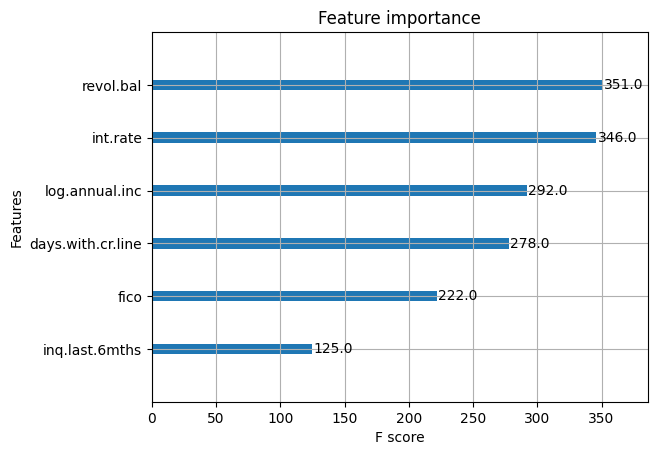

In [ ]:
xgb.plot_importance(model)

In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('lr', reg), ('dt', classifier), ('rf', classifier_rand_forest),('xgb', model)], voting='hard')
eclf1.fit(X_train, y_train)
predicted_y_ensemble = eclf1.predict(X_test)
print(eclf1.score(X_train, y_train))
print(eclf1.score(X_test, y_test))



C:\Users\Evgeniy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9972592012529365
0.9786012526096033


In [ ]:
print(confusion_matrix(y_test, predicted_y_ensemble))
print(classification_report(y_test, predicted_y_ensemble))

[[ 341   38]
 [   3 1534]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       379
           1       0.98      1.00      0.99      1537

    accuracy                           0.98      1916
   macro avg       0.98      0.95      0.97      1916
weighted avg       0.98      0.98      0.98      1916



### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [ ]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [ ]:
import requests
dff=pd.read_csv(url)
dff

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [ ]:
dff['city'].value_counts().head(5)

Paris        1004
London        969
Antwerpen      95
Name: city, dtype: int64

In [ ]:
#dff['date.utc']=dff['date.utc'].str.split("+").str[0]
dff

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00,London Westminster,no2,19.0,µg/m³


In [ ]:
from datetime import datetime
dff['time']=0
for i in range(0,len(dff)):
  dff['time'][i]=datetime.strptime(dff['date.utc'][i], "%Y-%m-%d %H:%M:%S")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
print('дата початку ведення даних '+str(dff['time'].min()))
print('дата кінця ведення даних '+str(dff['time'].max()))

дата початку ведення даних 2019-05-07 01:00:00
дата кінця ведення даних 2019-06-21 00:00:00


In [ ]:
dff=dff.set_index('time')
dff

,city,country,date.utc,location,parameter,value,unit
time,,,,,,,
2019-06-21 00:00:00,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2019-05-07 06:00:00,London,GB,2019-05-07 06:00:00,London Westminster,no2,26.0,µg/m³
2019-05-07 04:00:00,London,GB,2019-05-07 04:00:00,London Westminster,no2,16.0,µg/m³
2019-05-07 03:00:00,London,GB,2019-05-07 03:00:00,London Westminster,no2,19.0,µg/m³


In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    fig = {'data': data, 'layout': {'title': title}}
    iplot(fig, show_link=False)

In [ ]:
plotly_df(dff[dff['city'] == 'Paris'][['value']], title='Paris')

In [ ]:
plotly_df(dff[dff['city'] == 'London'][['value']], title='London')

In [ ]:
plotly_df(dff[dff['city'] == 'Antwerpen'][['value']], title='Antwerpen')

In [ ]:
dff

,city,country,date.utc,location,parameter,value,unit
time,,,,,,,
2019-06-21 00:00:00,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2019-05-07 06:00:00,London,GB,2019-05-07 06:00:00,London Westminster,no2,26.0,µg/m³
2019-05-07 04:00:00,London,GB,2019-05-07 04:00:00,London Westminster,no2,16.0,µg/m³
2019-05-07 03:00:00,London,GB,2019-05-07 03:00:00,London Westminster,no2,19.0,µg/m³


In [ ]:

for i in range(0,len(dff)):
  dff['week'][i]=datetime.strptime(dff['date.utc'][i], "%Y-%m-%d %H:%M:%S").weekday()
dff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,city,country,date.utc,location,parameter,value,unit,week,hour
time,,,,,,,,,
2019-06-21 00:00:00,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,4,0
2019-06-20 23:00:00,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,3,0
2019-06-20 22:00:00,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³,3,0
2019-06-20 21:00:00,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³,3,0
2019-06-20 20:00:00,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³,3,0
...,...,...,...,...,...,...,...,...,...
2019-05-07 06:00:00,London,GB,2019-05-07 06:00:00,London Westminster,no2,26.0,µg/m³,1,0
2019-05-07 04:00:00,London,GB,2019-05-07 04:00:00,London Westminster,no2,16.0,µg/m³,1,0
2019-05-07 03:00:00,London,GB,2019-05-07 03:00:00,London Westminster,no2,19.0,µg/m³,1,0


In [ ]:
for i in range(0,len(dff)):
  dff['hour'][i]=datetime.strptime(dff['date.utc'][i], "%Y-%m-%d %H:%M:%S").strftime("%H")
dff

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,city,country,date.utc,location,parameter,value,unit,week,hour
time,,,,,,,,,
2019-06-21 00:00:00,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,4,0
2019-06-20 23:00:00,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,3,23
2019-06-20 22:00:00,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³,3,22
2019-06-20 21:00:00,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³,3,21
2019-06-20 20:00:00,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³,3,20
...,...,...,...,...,...,...,...,...,...
2019-05-07 06:00:00,London,GB,2019-05-07 06:00:00,London Westminster,no2,26.0,µg/m³,1,6
2019-05-07 04:00:00,London,GB,2019-05-07 04:00:00,London Westminster,no2,16.0,µg/m³,1,4
2019-05-07 03:00:00,London,GB,2019-05-07 03:00:00,London Westminster,no2,19.0,µg/m³,1,3


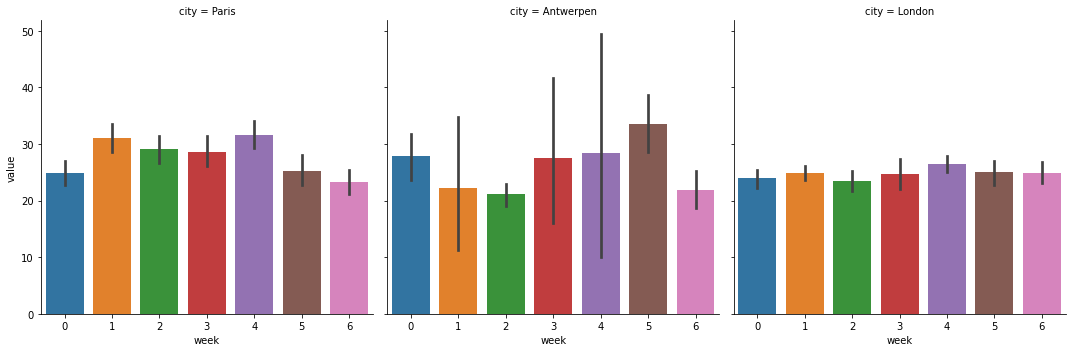

In [ ]:
br=dff
import seaborn as sns

br=br.groupby(['city','week'])['value'].mean()

mean_weeks = pd.DataFrame(br)
mean_weeks

sns.catplot(x='week', y='value', col='city', data=dff, kind='bar')

In [ ]:
mean_weeks

value
city      week           
Antwerpen 0     27.875000
          1     22.214286
          2     21.125000
          3     27.500000
          4     28.400000
          5     33.500000
          6     21.896552
London    0     23.969697
          1     24.885714
          2     23.460432
          3     24.780142
          4     26.446809
          5     24.977612
          6     24.859155
Paris     0     24.856250
          1     30.999359
          2     29.165753
          3     28.600690
          4     31.617986
          5     25.266154
          6     23.274306

In [ ]:
brr=dff


brr=brr.groupby(['city','hour'])['value'].mean()
mean_hours = pd.DataFrame(brr)
mean_hours

value
city      hour           
Antwerpen 0     24.750000
          1     25.838235
          2     21.000000
          3     21.333333
          4     24.833333
...                   ...
Paris     19    26.635714
          20    29.707143
          21    33.237209
          22    35.400000
          23    34.288095

[72 rows x 1 columns]

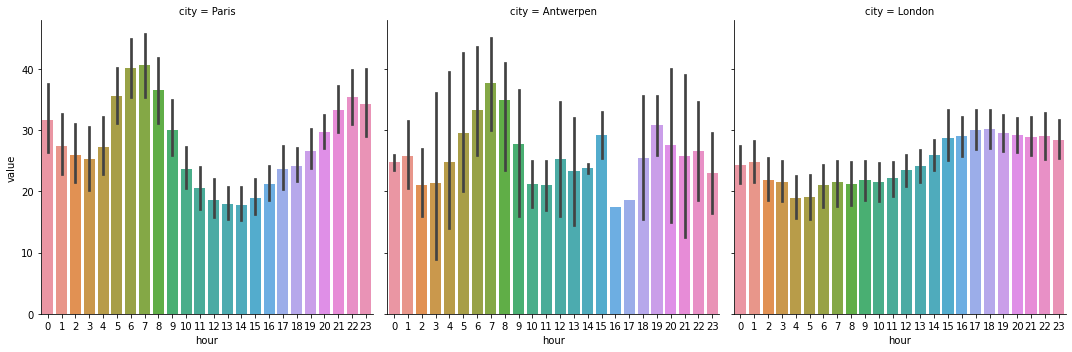

In [ ]:
sns.catplot(x='hour', y='value', col='city', data=dff, kind='bar')